# Histogram

## Bias and Variance Trade-off


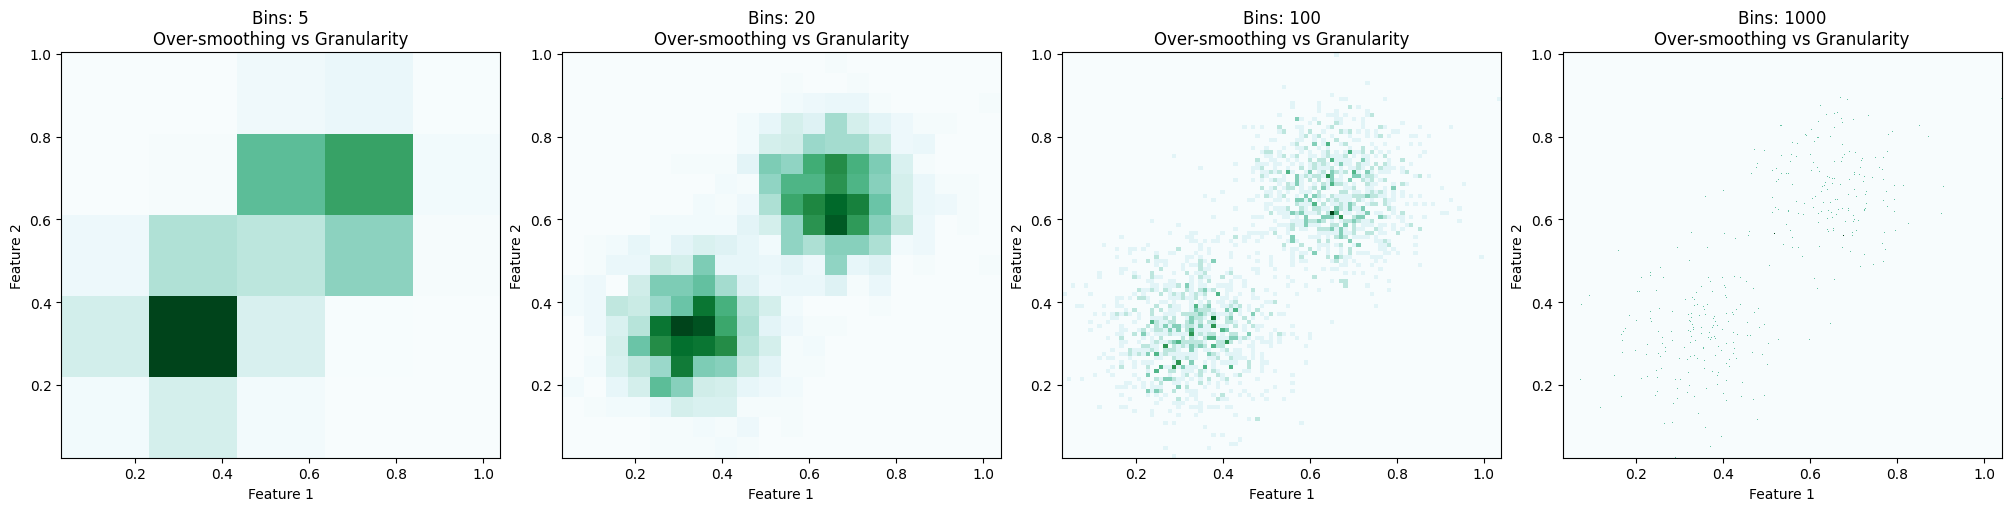

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic 2D data: a mixture of two Gaussians
np.random.seed(0)
data1 = np.random.normal(loc=0.33, scale=0.1, size=(1000, 2))
data2 = np.random.normal(loc=0.66, scale=0.1, size=(1000, 2))
data = np.vstack((data1, data2))

# Define different bin sizes to illustrate the trade-off
bin_sizes = [5, 20, 100, 1000]

# Create histograms with varying bin sizes
fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=True)
for ax, bins in zip(axs, bin_sizes):
    counts, xedges, yedges, image = ax.hist2d(data[:, 0], data[:, 1], bins=bins, cmap=plt.cm.BuGn)
    ax.set_title(f'Bins: {bins}\nOver-smoothing vs Granularity')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
plt.show()

We generate a simple 2D dataset that consists of points from two Gaussian distributions to create a scenario where there are clearly two clusters in the data.
We create histograms with four different bin sizes to show how the choice of bin size affects the visibility of these clusters in the histogram representation.
For small numbers of bins, the histogram might merge the two clusters, leading to over-smoothing where the distinct groups are not visible.
For a large number of bins, many bins will have very few or no points, leading to excessive granularity where the overall structure (the two clusters) might be obscured by the noise of too many empty or sparsely populated bins.

The argument about under-smoothing and over-smoothing in the context of histogram density estimation indeed applies to data of any dimensionality, including one-dimensional datasets. The choice of bin width (or bin size) critically affects the appearance and interpretability of a histogram, with too narrow bins leading to a noisy, over-detailed representation (under-smoothed), and too wide bins resulting in a too-smooth representation that may obscure important features of the data distribution (over-smoothed). Let's clarify how high dimensionality amplifies these issues and introduces unique challenges compared to lower-dimensional cases.

### Under-smoothing and Over-smoothing in Low Dimensions

- **1D Example**: In a one-dimensional histogram, the bin width directly controls the level of detail in the density estimation. A good choice of bin width can reveal important characteristics of the distribution, such as multimodality or skewness. The effects of under-smoothing and over-smoothing are directly observable and relatively straightforward to manage by adjusting the bin width based on data characteristics or using rules of thumb (e.g., Freedman-Diaconis rule).
  
- **Low-dimensional Flexibility**: In one or two dimensions, it's easier to visually assess the histogram and adjust the binning strategy accordingly to achieve an optimal balance between smoothing and detail. The impact of bin width on the interpretability of the histogram is immediate and can be corrected through iteration.

### The Impact of High Dimensionality

- **Exponential Increase in Complexity**: As dimensionality increases, the data space expands exponentially. This expansion dramatically increases the number of possible bins for a given bin width, leading to a combinatorial explosion in the number of bins as you try to maintain the same level of granularity as in lower dimensions.

- **Sparsity and Empty Bins**: High-dimensional data are inherently sparse due to the curse of dimensionality. This means that as you increase the number of bins to capture detail (avoiding over-smoothing), you end up with a vast majority of bins being empty or nearly empty, which makes the histogram a poor tool for visualizing or understanding the data distribution.

- **Loss of Intuitive Control**: In one or two dimensions, adjusting bin width to control smoothing is intuitive and directly observable. In high dimensions, however, you cannot easily visualize the histogram or directly assess the impact of bin width on the representation of the data distribution. The concept of "optimal" bin width becomes harder to define and apply because the direct relationship between bin width and the interpretability of the histogram is lost in the multidimensional space.

- **Dimensionality versus Observability**: Even if you could compute a high-dimensional histogram, observing and interpreting it becomes impractical. The process of choosing bin widths to balance under-smoothing and over-smoothing relies on observability and interpretability, which are compromised in high-dimensional spaces.

### Conclusion

While the fundamental trade-off between under-smoothing and over-smoothing exists in data of any dimensionality, high dimensionality exacerbates the issue by introducing practical challenges related to data sparsity, computational complexity, and the loss of direct observability. In high-dimensional spaces, the simple act of choosing an appropriate bin width becomes entangled with these challenges, making traditional histogram-based approaches to density estimation less viable. Consequently, alternative techniques, such as dimensionality reduction or sophisticated density estimation methods that account for the peculiarities of high-dimensional data, become necessary.

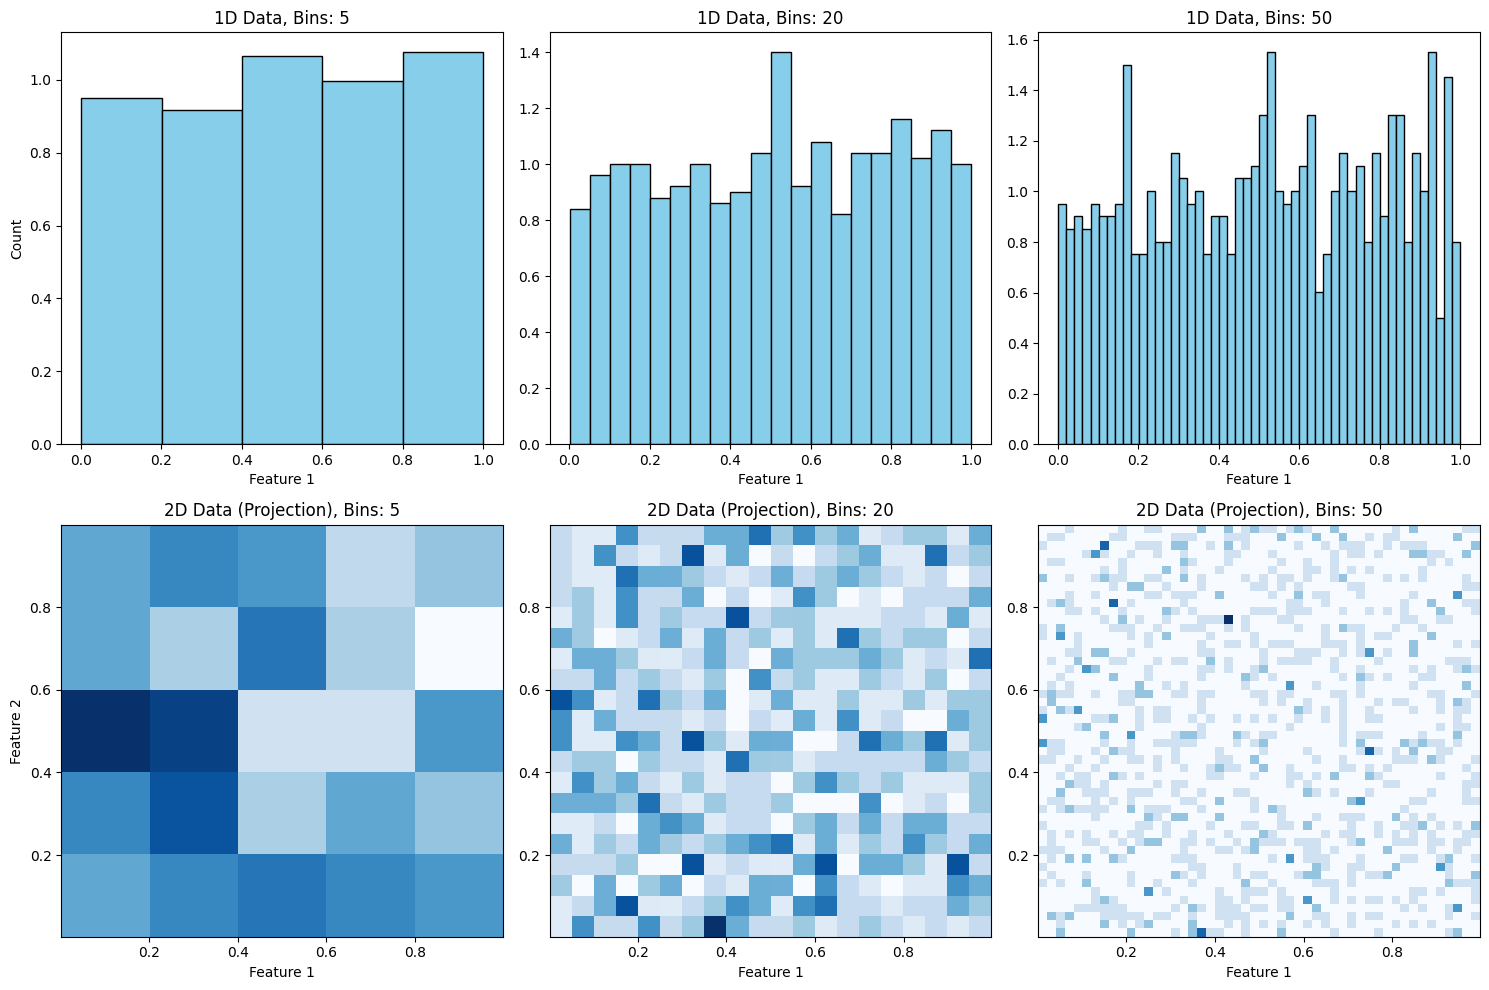

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms_for_dimensions(dimensions, points=1000, bin_sizes=[5, 20, 50]):
    fig, axs = plt.subplots(len(dimensions), len(bin_sizes), figsize=(15, len(dimensions) * 5))
    
    for i, dim in enumerate(dimensions):
        # Generate data: uniform distribution in a unit hypercube of given dimension
        data = np.random.uniform(0, 1, (points, dim))
        
        for j, bins in enumerate(bin_sizes):
            ax = axs[i, j] if len(dimensions) > 1 else axs[j]
            if dim == 1:
                # Directly plot the histogram for 1D data
                ax.hist(data, bins=bins, density=True, color='skyblue', edgecolor='black')
                ax.set_title(f'1D Data, Bins: {bins}')
            else:
                # For 2D, we'll use a 2D histogram. Note that we're simplifying by
                # projecting to the first two dimensions for visualization.
                counts, xedges, yedges, image = ax.hist2d(data[:, 0], data[:, 1], bins=bins, cmap='Blues', density=True)
                ax.set_title(f'{dim}D Data (Projection), Bins: {bins}')
            
            ax.set_xlabel('Feature 1')
            if j == 0:
                ax.set_ylabel('Feature 2' if dim > 1 else 'Count')
    
    plt.tight_layout()
    plt.show()

# Simulate for 1D and 2D data to observe the impact of bin size
plot_histograms_for_dimensions([1, 2], points=1000, bin_sizes=[5, 20, 50])

1D Bins 50 and 2D Bins 50 both have the same number of bins per dimension but 2D Data is more sparse. Practical Implication is that when dealing with high-dimensional data, traditional histogram-based density estimation often fails to provide meaningful insights. The data might either appear too uniform due to over-smoothing or too fragmented with excessive granularity, complicating efforts to analyze or visualize the underlying distribution accurately. It is hard to adjust the bin size to get a informative histogram because the number of cells increases exponentially with the #bin/dim, consequently leading to under-smoothing.